![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> Detecção de Doenças do Fígado</font>


![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLFAkEaCez-6d-dw8wP3tz4D7JQpvV81KsmA&usqp=CAU)![alt text](https://jaleko-blog-files.s3.amazonaws.com/wp-content/uploads/2020/10/26115817/Localizacao-do-Figado.gif) 

In [ ]:
%%html
<marquee style='width: 90%; color: RED;'><b>Eu sei que vc Gosta da Cervejinha!</b></marquee>

## **Contexto**

Os pacientes com doença hepática têm aumentado continuamente devido ao consumo excessivo de álcool, inalação de gases nocivos, ingestão de alimentos contaminados, bem como uso de medicamentos. Este conjunto de dados foi usado para possibilitar a criação de Máquinas Preditivas com algoritmos de previsão num esforço para **reduzir a carga sobre os médicos**.




#1° Problema de Negócio 
Precisamos construir uma Máquina Preditiva que, a partir de dados históricos de pacientes, determine quais pacientes têm doença hepática e quais não têm.


# 2° Análise Exploratória dos Dados

Este conjunto de dados foi baixado do Repositório UCI ML:
Lichman, M. (2013). UCI Machine Learning Repository [ http://archive.ics.uci.edu/ml . Irvine, CA: Universidade da Califórnia, Escola de Informação e Ciência da Computação.

Com base em compostos químicos (bilrubina, albumina, proteína, fosfatase alcalina) presentes no corpo humano e testes como SGOT, SGPT o resultado mencionado se o paciente tem ou não problemas hepáticos.

Este conjunto de dados contém 416 registros de pacientes do fígado e 167 registros de doenças do fígado coletados no Nordeste de Andhra Pradesh, na Índia. 

A coluna "dataset" é um rótulo de classe(label/TARGET) usado para dividir grupos em pacientes com doença hepática ou não (sem doença). 

Este conjunto de dados contém 441 registros de pacientes do sexo masculino e 142 do sexo feminino.


## AD - Arquitetura dos Dados/Dicionário de Dados

* Idade do paciente
* Sexo do paciente
* Bilirrubina Total
* Bilirrubina direta
* Fosfotase Alcalina
* Alamina Aminotransferase
* Aspartato Aminotransferase
* Protiens Total
* Albumina
* Proporção de albumina e globulina
* dataset: campo usado para dividir os dados em dois conjuntos (paciente com doença hepática ou sem doença)



In [1]:
# Set-up libraries needed
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read-in data
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

In [5]:
df

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
# Look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   65      582 non-null    int64  
 1   Female  582 non-null    object 
 2   0.7     582 non-null    float64
 3   0.1     582 non-null    float64
 4   187     582 non-null    int64  
 5   16      582 non-null    int64  
 6   18      582 non-null    int64  
 7   6.8     582 non-null    float64
 8   3.3     582 non-null    float64
 9   0.9     578 non-null    float64
 10  1       582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [7]:
# Look at some records
df.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [31]:
# Look at breakdown of label
df['Dataset'].value_counts()
sns.countplot(df['Dataset'])

KeyError: ignored

In [12]:
# Look at breakdown of categorical feature(s)
df['Gender'].value_counts()

KeyError: ignored

In [13]:
# Summarise
df.describe()

,65,0.7,0.1,187,16,18,6.8,3.3,0.9,1
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#3° Pré-Processamento dos Dados

In [14]:
# Remove records with missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   65      578 non-null    int64  
 1   Female  578 non-null    object 
 2   0.7     578 non-null    float64
 3   0.1     578 non-null    float64
 4   187     578 non-null    int64  
 5   16      578 non-null    int64  
 6   18      578 non-null    int64  
 7   6.8     578 non-null    float64
 8   3.3     578 non-null    float64
 9   0.9     578 non-null    float64
 10  1       578 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.2+ KB


In [15]:
# Transform categorical feature(s) to numeric
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

AttributeError: ignored

In [16]:
df

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [17]:
# Explore correlations to label
df.corr().Dataset.sort_values(ascending=False)

AttributeError: ignored

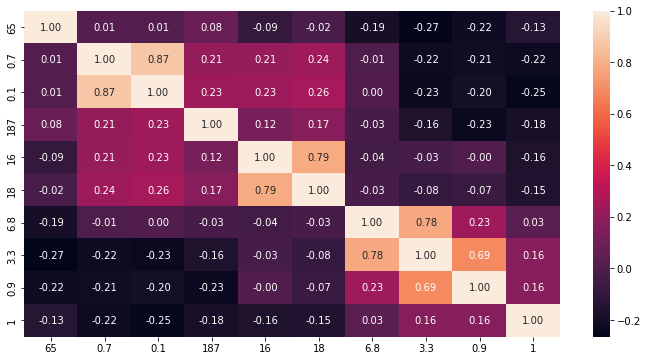

In [18]:
# Explore correlations visually
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [19]:
# Split data into 80% train and 20% validation
X = df.drop('Dataset', axis=1)
y = df['Dataset']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

KeyError: ignored

#4° Máquina Preditiva Segmentação de Clientes

### Baseline

In [20]:
# Build and train the model
model = RandomForestClassifier().fit(X_train,y_train)
model

NameError: ignored

### Máquina Final

In [22]:
# Build and train the model   
model = XGBClassifier(learning_rate=0.2, max_depth=1).fit(X_train,y_train) 
model 

NameError: ignored

In [23]:
# Apply model to validation data
y_predict = model.predict(X_val)

NameError: ignored

In [24]:
# Compare actual and predicted values
actual_vs_predict = pd.DataFrame({'Gabarito(valor real)': y_val,
                                'Previsão_Máquina_Preditiva': y_predict})
actual_vs_predict.sample(12)

NameError: ignored

In [25]:
# plot feature importance
plot_importance(model)
plt.show()

NameError: ignored

#5° Avaliação da Máquina Preditiva

In [26]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))
print('Acurácia: \n', accuracy_score(y_val, y_predict))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_predict,))

NameError: ignored

In [27]:
cm = confusion_matrix(y_val, y_predict, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Doente','Saudável'])
cmd.plot()

NameError: ignored

# **Resumão**

1. Conhecemos as Variáveis e o Que queremos Prever
2. Fizemos os tratamentos nos dados para....
3. Construir a Máquina preditiva com RF
4. Avaliamos a Máquina Preditiva e Criamos uma mais Potente
5. Finalizamos a Máquina com o XGBoost
6. Analisar a Confusion matrix
7. Fizemos o Tunning, a tunagem do hyperpârametro conhecido como 

"**learning_rating**". 

Se você não sabe porque usamos essa learning rate, aqui vai uma explicação rápida. Basicamente todos os modelos de machine learning, no final, são treinados para minimizar uma função de perda. 

A função de perda é uma penalidade por uma má previsão, sendo uma uma medida de quão bom um modelo de previsão faz em termos de ser capaz de prever o resultado esperado. Com o objetivo de minimizar essa função de perda, normalmente usamos o chamado método do gradiente. 

Esse método, para encontrar um mínimo local de uma função usa-se um esquema iterativo, onde em cada passo se toma a direção a qual a função mais decresce.

A learning rate é o que determina o tamanho do passo em cada iteração enquanto se move para um mínimo dessa função de perda. É como tentar encontrar o ponto mais baixo de uma montanha a noite. 

Para fazer isso, a cada momento você deve dar um pequeno passo na direção onde tem o maior declive. Como a learning rate influencia até que ponto as informações recém-adquiridas substituem as informações antigas, ela metaforicamente representa a velocidade com que um modelo de machine learning “aprende”.

#Fim

## Valeu!

###Links ùteis - Xgboost - https://datarisk.io/gradient-boostings-parte-2-xgboost/?cn-reloaded=1

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/p4bvCFygfW0" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')